In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Seaborns geyser dataset will be used to show regression imputation
import seaborn as sns
# Scikit-learns liner_model will be used for regression imputation
from sklearn import linear_model

geyser = pd.read_csv('geyser.csv')
print(geyser)

     Unnamed: 0  duration  waiting   kind
0             0     3.600       79   long
1             1     1.800       54  short
2             2     3.333       74   long
3             3     2.283       62  short
4             4     4.533       85   long
..          ...       ...      ...    ...
267         267     4.117       81   long
268         268     2.150       46  short
269         269     4.417       90   long
270         270     1.817       46  short
271         271     4.467       74   long

[272 rows x 4 columns]


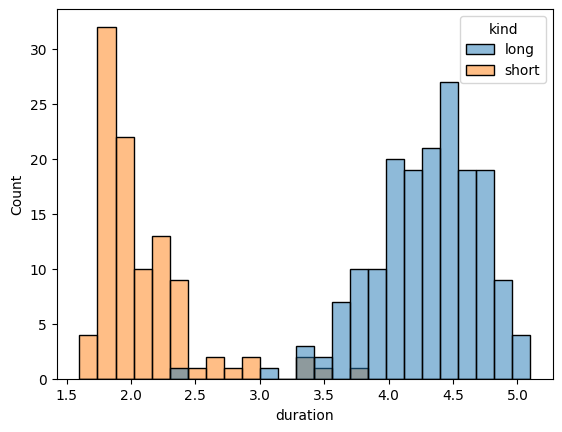

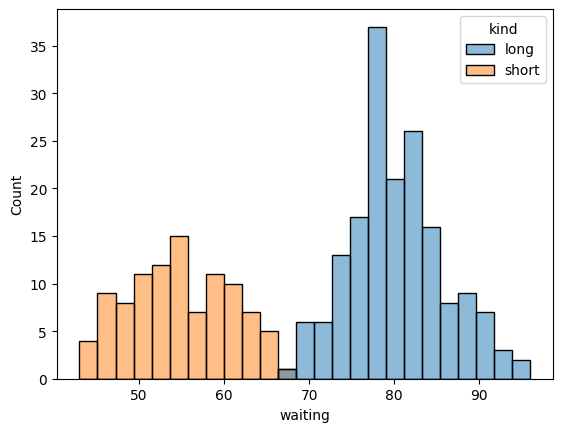

In [3]:
sns.histplot(data=geyser, x='duration', bins=25, hue='kind')
plt.show()
sns.histplot(data=geyser, x='waiting', bins=25, hue='kind')
plt.show()

     Unnamed: 0  duration  waiting   kind qcut_dur_1 qcut_dur_2
0             0     3.600       79   long      short        med
1             1     1.800       54  short      short      short
2             2     3.333       74   long      short        med
3             3     2.283       62  short      short      short
4             4     4.533       85   long       long       long
..          ...       ...      ...    ...        ...        ...
267         267     4.117       81   long       long        med
268         268     2.150       46  short      short      short
269         269     4.417       90   long       long       long
270         270     1.817       46  short      short      short
271         271     4.467       74   long       long       long

[272 rows x 6 columns]


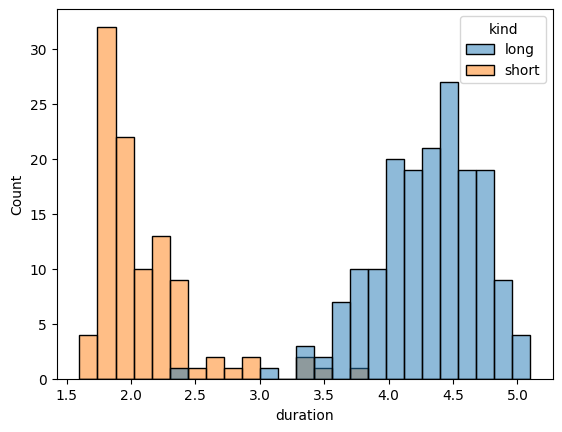

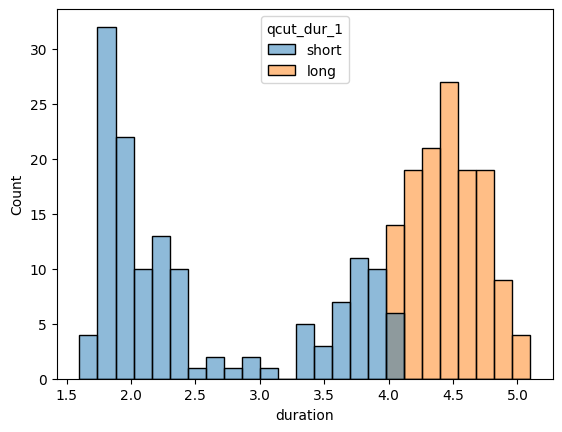

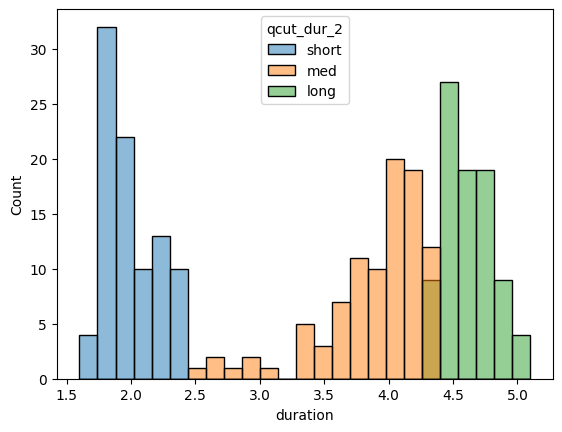

In [12]:
# pd.qcut creates bins of equal data point count where pd.cut creates bins of equal size in terms of bin ranges and count may be unequal
geyser['qcut_dur_1'] = pd.qcut(geyser.duration, q=2, labels=['short', 'long'])
geyser['qcut_dur_2'] = pd.qcut(geyser.duration, q=3, labels=['short', 'med', 'long'])

print(geyser)


sns.histplot(data=geyser, x='duration', bins=25, hue='kind')
plt.show()
sns.histplot(data=geyser, x='duration', bins=25, hue='qcut_dur_1')
plt.show()
sns.histplot(data=geyser, x='duration', bins=25, hue='qcut_dur_2')
plt.show()

In [15]:
geyser['cut_dur_1'] = pd.cut(geyser.duration, bins=2, labels=['short', 'long'])
geyser['cut_dur_2'] = pd.cut(geyser.duration, bins=3, labels=['short', 'med', 'long'])
print(geyser)

     Unnamed: 0  duration  waiting   kind qcut_dur_1 qcut_dur_2 cur_dur_1  \
0             0     3.600       79   long      short        med      long   
1             1     1.800       54  short      short      short     short   
2             2     3.333       74   long      short        med     short   
3             3     2.283       62  short      short      short     short   
4             4     4.533       85   long       long       long      long   
..          ...       ...      ...    ...        ...        ...       ...   
267         267     4.117       81   long       long        med      long   
268         268     2.150       46  short      short      short     short   
269         269     4.417       90   long       long       long      long   
270         270     1.817       46  short      short      short     short   
271         271     4.467       74   long       long       long      long   

    cur_dur_2 cut_dur_1 cut_dur_2  
0         med      long       med  
1  

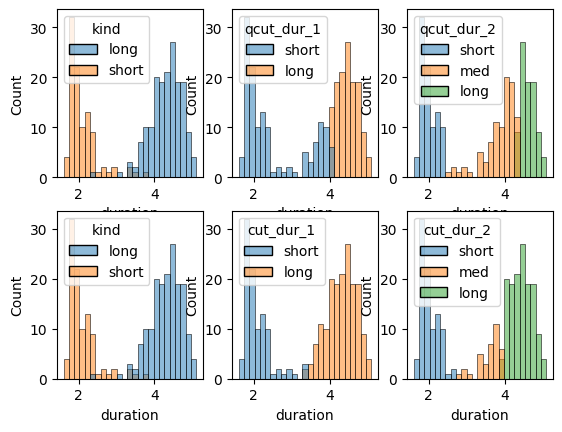

In [17]:
fig, ((kind, qd1, qd2), (kind2, cd1, cd2)) = plt.subplots(2,3)

sns.histplot(data=geyser, x='duration', bins=25, hue='kind', ax=kind)
sns.histplot(data=geyser, x='duration', bins=25, hue='qcut_dur_1', ax=qd1)
sns.histplot(data=geyser, x='duration', bins=25, hue='qcut_dur_2', ax=qd2)
sns.histplot(data=geyser, x='duration', bins=25, hue='kind', ax=kind2)
sns.histplot(data=geyser, x='duration', bins=25, hue='cut_dur_1', ax=cd1)
sns.histplot(data=geyser, x='duration', bins=25, hue='cut_dur_2', ax=cd2)
plt.show()

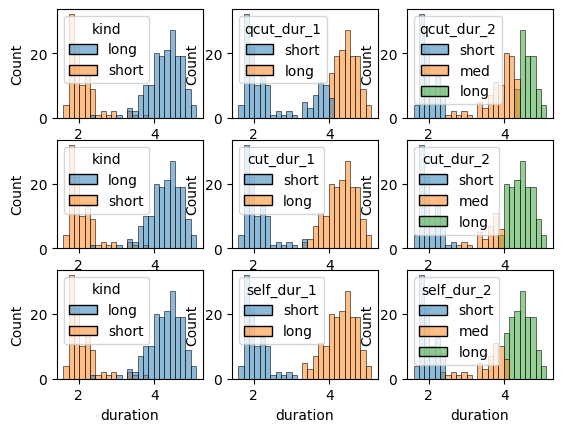

In [19]:
geyser['self_dur_1'] = pd.cut(geyser.duration, bins=[0, 3.3, 100], labels=['short', 'long'])
geyser['self_dur_2'] = pd.cut(geyser.duration, bins=[0, 2.4, 4, 100], labels=['short', 'med', 'long'])

fig, ((kind, qd1, qd2), (kind2, cd1, cd2), (kind3, sd1, sd2)) = plt.subplots(3,3)

sns.histplot(data=geyser, x='duration', bins=25, hue='kind', ax=kind)
sns.histplot(data=geyser, x='duration', bins=25, hue='qcut_dur_1', ax=qd1)
sns.histplot(data=geyser, x='duration', bins=25, hue='qcut_dur_2', ax=qd2)
sns.histplot(data=geyser, x='duration', bins=25, hue='kind', ax=kind2)
sns.histplot(data=geyser, x='duration', bins=25, hue='cut_dur_1', ax=cd1)
sns.histplot(data=geyser, x='duration', bins=25, hue='cut_dur_2', ax=cd2)
sns.histplot(data=geyser, x='duration', bins=25, hue='kind', ax=kind3)
sns.histplot(data=geyser, x='duration', bins=25, hue='self_dur_1', ax=sd1)
sns.histplot(data=geyser, x='duration', bins=25, hue='self_dur_2', ax=sd2)
plt.show()